In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from analyzer import Analyzer

In [3]:
train = pd.read_csv('prep_train.csv')
val = pd.read_csv('prep_val.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, val.shape, test.shape

((129066, 39), (21511, 139), (64533, 2))

In [1]:
from gensim.models import Word2Vec

In [4]:
train['sent_POS_text']

0                   NOUN NOUN ADJF PREP ADJF NOUN ADJF NOUN
1         None NOUN PRCL NOUN NPRO NOUN INFN NOUN ADJF N...
2                                  VERB PRCL ADVB ADVB VERB
3                        NOUN VERB NOUN NOUN NOUN ADJF NOUN
4         PREP NOUN None NOUN NOUN NOUN VERB NOUN PREP N...
                                ...                        
129061    NOUN None None NOUN None None PREP NOUN ADJF N...
129062    NUMR NOUN VERB ADJF NOUN PREP ADJF NOUN NOUN P...
129063    PREP ADJF NOUN NOUN NOUN VERB ADJF NOUN ADVB N...
129064                                  PREP NOUN ADJF NOUN
129065    NOUN VERB PREP NOUN PREP NOUN NOUN PREP NOUN P...
Name: sent_POS_text, Length: 129066, dtype: object

In [4]:
val = val[[col for col in list(val) if 'dv_' not in col]]

In [3]:
analyzer = Analyzer('train')
analyzer.analyzed_col = 'sent_POS_text'

In [5]:
import gensim

model = gensim.models.Word2Vec.load('word2vec.model')

In [6]:
model.wv

In [10]:
vocab = list(model.wv.key_to_index)
povocab

['NOUN',
 'ADJF',
 'PREP',
 'None',
 'VERB',
 'CONJ',
 'NPRO',
 'ADVB',
 'PRCL',
 'INFN',
 'PRTF',
 'PRTS',
 'ADJS',
 'NUMR',
 'PRED',
 'GRND',
 'COMP',
 'INTJ']

In [13]:
'\t'.join(map(str, model.wv['None']))

'-0.74849164\t-0.016440477\t0.7033729\t-0.85169244\t0.40016246\t-0.5810844\t-1.0438801\t4.261011\t0.5596296\t-1.9166043\t1.516909\t5.22645\t1.0920554\t-2.4872072\t2.8856199\t-3.9830105\t-0.20617351\t2.5473897\t-1.3508\t0.8772642\t0.35450888\t0.5011177\t1.5103401\t-1.5956503\t3.9857912\t-1.2797375\t1.0761979\t-1.517197\t0.3352032\t0.3906144\t1.8319159\t-0.15944307\t1.1122271\t-4.98739\t-2.1936476\t1.0302399\t-0.08091977\t-1.7911991\t-1.885218\t-1.8070511\t-1.5552547\t-0.011989762\t3.725976\t-2.2416239\t0.92718387\t0.89931667\t-0.419241\t-0.19907098\t-0.14889671\t1.0041192\t-0.501933\t-1.6294181\t-3.3739517\t-1.601543\t-0.6786019\t-0.9225113\t2.7682097\t0.018136691\t-0.9613646\t0.5685879\t-0.36159876\t-0.11288919\t2.145612\t-2.7210557\t1.0731356\t1.5448462\t0.79668033\t3.214673\t-1.623721\t-2.2603657\t1.2457333\t-0.022041604\t-1.3490736\t0.52691257\t0.50672406\t-1.2129828\t2.1197891\t1.8983538\t1.5517435\t-2.2552288\t0.82966954\t1.2379822\t0.08714297\t0.68827903\t0.553775\t1.9816177\t1.8

In [15]:
pos_vectors = []
pos_names = []

for pos_name in vocab:
    pos_vectors.append('\t'.join(map(str, model.wv[pos_name])))
    pos_names.append(pos_name)
    
with open('pos_vectors.tsv', 'w') as f:
    f.write('\n'.join(pos_vectors))

with open('pos_names.tsv', 'w') as f:
    f.write('\n'.join(pos_names))

In [7]:
model.wv['NOUN']

array([-0.2874522 ,  0.85130095, -0.01534773, -0.04884012,  0.14866215,
       -0.09482151, -0.36148   , -0.38378868, -0.08952446,  0.41745612,
       -0.19127071,  0.0362182 , -0.51798254, -0.03100233,  0.3440144 ,
        0.6484209 , -0.41542804, -0.40429282,  0.26474258,  0.53980845,
        0.24455816,  0.3281851 , -0.73636836,  0.5060767 ,  0.43129826,
       -0.220559  ,  0.12219408, -1.3245472 ,  1.100471  , -0.21820113,
        0.8391931 , -0.2874885 ,  0.05190698, -1.8615727 ,  0.97415376,
       -0.01516293,  0.08186497,  0.35106146,  0.18813564, -0.15669465,
        0.41836596, -0.14104468, -0.4069133 ,  0.6092934 ,  0.0114898 ,
       -0.4830417 , -0.10276387,  0.3749026 ,  0.11199082, -0.1916937 ,
       -0.01822144,  0.13101006,  0.44583628, -0.17435515,  0.3357939 ,
       -0.40758246, -0.42986143, -0.16206297,  0.15623274, -0.5364317 ,
       -0.21661139,  0.21488027, -0.18391138,  0.18611649,  0.44986185,
       -0.1971969 ,  0.31041515,  0.22967777, -0.40256876, -0.51

In [7]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

X = model.wv[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [12]:
model.wv.index_to_key()

TypeError: 'list' object is not callable

In [6]:
len(model.wv)

18

In [38]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.21.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/nanosemantics/.local/lib/python3.8/site-packages
Requires: joblib, numpy, scipy
Required-by: deeppavlov, librosa


In [39]:
!pip install scikit-learn==0.23.1

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeppavlov 0.17.1 requires numpy==1.18.0, but you have numpy 1.21.4 which is incompatible.
deeppavlov 0.17.1 requires requests==2.22.0, but you have requests 2.25.1 which is incompatible.
deeppavlov 0.17.1 requires scikit-learn==0.21.2, but you have scikit-learn 0.23.1 which is incompatible.
deeppavlov 0.17.1 requires scipy==1.4.1, but you have scipy 1.6.3 which is incompatible.


In [2]:
from sklearn.decomposition import PCA

In [4]:
model.vw

NameError: name 'model' is not defined

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

In [32]:
from sklearn.lda import LDA

ModuleNotFoundError: No module named 'sklearn.lda'

In [29]:
model.wv[10]

array([ 0.04470874,  0.6628131 , -0.3481395 , -0.02961009,  0.00572962,
        0.02570482, -0.16590007, -0.6457095 , -0.7343817 ,  0.9429476 ,
       -0.49702483, -0.13238746, -0.33526668,  0.49036783, -0.03657308,
        0.86074233, -0.61553574, -0.8506943 ,  0.7412843 ,  0.68052554,
        0.51669085,  0.6199167 , -0.9593267 ,  0.67976445,  0.24157555,
       -0.3554617 ,  0.1752105 , -1.586104  ,  1.2389504 , -0.6177737 ,
        0.9936832 ,  0.02576716,  0.02313237, -0.9793699 ,  1.0027975 ,
       -0.15945259,  0.2328022 ,  0.28655618,  0.2530978 ,  0.05210338,
        0.4573541 , -0.15506767,  0.25227767,  0.5735993 , -0.12248959,
       -0.47727984, -0.25953802,  0.1838962 ,  0.03093045, -0.5295079 ,
       -0.01603477,  0.27244297,  0.6878788 , -0.16079348,  0.22760019,
       -0.37312514, -0.827438  , -0.09424496,  0.42157888, -0.8131631 ,
       -0.04908488,  0.36280125, -0.4023944 ,  0.6851493 ,  0.6593176 ,
       -0.64173007,  0.7096138 , -0.48257494, -0.0273924 , -0.08

In [16]:
model.wv.most_similar('NOUN')

[('ADJF', 0.9068644642829895),
 ('PREP', 0.902047872543335),
 ('PRTF', 0.8427443504333496),
 ('PRTS', 0.6658680438995361),
 ('None', 0.07352957874536514),
 ('NUMR', -0.07693822681903839),
 ('GRND', -0.3079085052013397),
 ('CONJ', -0.6583704352378845),
 ('ADJS', -0.678288459777832),
 ('VERB', -0.7007269263267517)]

In [8]:
train = analyzer.add_wv_vectors(train)

Train w2v model is complete...


4163it [00:24, 166.68it/s]


KeyboardInterrupt: 

In [6]:
train = analyzer.add_d2v_vectors(train)

In [7]:
inf_analyzer = Analyzer('inference')
inf_analyzer.analyzed_col = 'text'

In [8]:
val = inf_analyzer.add_d2v_vectors(val)

In [9]:
test.columns = ['id', 'text']

In [10]:
test = inf_analyzer.data_processing(test, 'text')

Text lemmatized and trash removed...
Features is calculated...
Count POS is complete...


In [42]:
train['tokens_text'] = train['text'].apply(lambda x: analyzer.tokenize_text(x))
val['tokens_text'] = val['text'].apply(lambda x: analyzer.tokenize_text(x))
test['tokens_text'] = test['text'].apply(lambda x: analyzer.tokenize_text(x))

In [43]:
from kenlm import Model

kenlm_model = Model('../kenlm/lm_model_files/4.arpa')

Loading the LM will be faster if you build a binary file.
Reading /raid/nanosemantics/sasha/projects/kenlm/lm_model_files/4.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************


In [44]:
def kenlm_score(text):
    return kenlm_model.score(text, bos = True, eos = True)

In [45]:
train['kenlm_score'] = train['tokens_text'].apply(lambda x: kenlm_score(x))
val['kenlm_score'] = val['tokens_text'].apply(lambda x: kenlm_score(x))
test['kenlm_score'] = test['tokens_text'].apply(lambda x: kenlm_score(x))

In [46]:
train.shape, val.shape, test.shape

((129066, 141), (21511, 141), (64533, 158))

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
train['text'] = train['text'].apply(lambda x: x[:512])
train['class'] = train['class'].map({'M': 1, 'H': 0})

In [13]:
val['text'] = val['text'].apply(lambda x: x[:512])
val['class'] = val['class'].map({'M': 1, 'H': 0})

In [14]:
test['text'] = test['text'].apply(lambda x: x[:512])

In [15]:
train['text'] = train['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [16]:
val['text'] = val['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [17]:
test['text'] = test['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [20]:
cols = [col for col in list(train) if 'ft_' not in col]

dropped_cols = ['count_POS_text', 'POS_text', 'id', 'class', 'lemm_text', 'sent_POS_text']

for col in dropped_cols:
    cols.pop(cols.index(col))

In [21]:
train.fillna(0, inplace=True)
val.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [22]:
test.shape, train.shape, val.shape

((64533, 156), (129066, 139), (21511, 139))

In [23]:
test.isnull().sum().sort_values().tail(50)

count_lowercase_text                0
mean_ru_vowel_occurance_text        0
mean_ru_consonant_occurance_text    0
mean_en_vowel_occurance_text        0
mean_en_consonant_occurance_text    0
count_space_text                    0
count_kirr_text                     0
count_lat_text                      0
avg_word_len_text                   0
POS_INTJ_text                       0
POS_NOUN                            0
POS_None                            0
text_dv_4                           0
text_dv_5                           0
text_dv_6                           0
text_dv_7                           0
text_dv_8                           0
text_dv_9                           0
text_dv_10                          0
text_dv_3                           0
text_dv_11                          0
text_dv_13                          0
text_dv_14                          0
text_dv_15                          0
text_dv_16                          0
text_dv_17                          0
text_dv_18  

In [24]:
test.fillna(0, inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train, y_train = train[cols], train['class']
x_val, y_val = val[cols], val['class']

In [28]:
x_test = test[cols]

In [29]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

In [30]:
from tqdm import tqdm

tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(x_train['text'])]

100%|█████████████████████████████████████████████████████████████████████████| 129066/129066 [00:52<00:00, 2447.71it/s]


In [31]:
val_tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(x_val['text'])]

100%|███████████████████████████████████████████████████████████████████████████| 21511/21511 [00:08<00:00, 2507.70it/s]


In [32]:
test_tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(x_test['text'])]

100%|███████████████████████████████████████████████████████████████████████████| 64533/64533 [00:26<00:00, 2413.02it/s]


In [33]:
feature_cols = [col for col in list(x_train) if col != 'text']
#feature_cols = feature_cols[1:][:14] + feature_cols[1:][15:]

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(tokenized_texts)]

train_inputs = pad_sequences(train_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')

train_masks = [[float(i>0) for i in seq] for seq in train_inputs]

validation_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(val_tokenized_texts)]

validation_inputs = pad_sequences(validation_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')

validation_masks = [[float(i>0) for i in seq] for seq in validation_inputs]

train_labels, validation_labels = np.array(y_train), np.array(y_val)

train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

train_features = np.array(train[feature_cols], dtype='float32')
validation_features = np.array(val[feature_cols], dtype='float32')
train_features = scaler.fit_transform(train_features)
validation_features = scaler.transform(validation_features)

train_features = torch.tensor(train_features)
validation_features = torch.tensor(validation_features)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

train_data = torch.utils.data.TensorDataset(train_inputs, train_masks, train_features, train_labels)
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=8,
    sampler=torch.utils.data.RandomSampler(train_data)
)

validation_data = torch.utils.data.TensorDataset(validation_inputs, validation_masks, validation_features, validation_labels)
validation_dataloader = torch.utils.data.DataLoader(
    validation_data,
    batch_size=8,
    sampler=torch.utils.data.SequentialSampler(validation_data)
)

100%|██████████████████████████████████████████████████████████████████████████| 21511/21511 [00:00<00:00, 36770.70it/s]


In [35]:
test_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(test_tokenized_texts)]

test_inputs = pad_sequences(test_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')


test_masks = [[float(i>0) for i in seq] for seq in test_inputs]

test_inputs = torch.tensor(test_inputs)
test_masks = torch.tensor(test_masks)

test_features = np.array(test[feature_cols], dtype='float32')
test_features = scaler.transform(test_features)
test_features = torch.tensor(test_features)

test_data = torch.utils.data.TensorDataset(test_inputs, test_masks, test_features)
test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=8,
    sampler=torch.utils.data.SequentialSampler(test_data)
)

100%|██████████████████████████████████████████████████████████████████████████| 64533/64533 [00:01<00:00, 40143.29it/s]


In [36]:
from transformers import AdamW, BertConfig

In [40]:
from torch.nn import functional as F

In [41]:

class myBertModel(torch.nn.Module):
    def __init__(self, hidden_neurons, n_features):
        super(myBertModel, self).__init__()
        config = BertConfig.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=2)
        self.model = BertModel.from_pretrained('DeepPavlov/rubert-base-cased', config=config)
        self.hidden_neurons = hidden_neurons
        self.n_features = n_features
        self.linear1 = torch.nn.Linear(config.hidden_size, self.hidden_neurons)
        self.linear2 = torch.nn.Linear(self.hidden_neurons, int(self.hidden_neurons / 2))
        self.linear3 = torch.nn.Linear(self.n_features, int(self.n_features / 2))
        self.linear4 = torch.nn.Linear(int(self.n_features / 2), int(self.hidden_neurons / 2))
        self.classifier = torch.nn.Linear(self.hidden_neurons, 2)
        self.activation = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(.3)
        self.batchnorm1 = torch.nn.BatchNorm1d(self.hidden_neurons)
        self.batchnorm2 = torch.nn.BatchNorm1d(int(self.hidden_neurons / 2))
        self.batchnorm3 = torch.nn.BatchNorm1d(int(self.n_features / 2))
        self.batchnorm4 = torch.nn.BatchNorm1d(int(self.hidden_neurons / 2))

    def forward(self, input_ids, attention_mask, features):
        bert_output = self.model(input_ids=input_ids, attention_mask=attention_mask)
        seq_output = bert_output[0]
        pooled_output = seq_output.mean(axis=1)
        pooled_output = self.dropout(pooled_output)
        
        x1 = self.dropout(F.relu(self.batchnorm1(self.linear1(pooled_output))))
        x1 = self.dropout(F.relu(self.batchnorm2(self.linear2(x1))))
        
        x2 = self.dropout(F.relu(self.batchnorm3(self.linear3(features))))
        x2 = self.dropout(F.relu(self.batchnorm4(self.linear4(x2))))
        
        scores = self.dropout(self.classifier(torch.cat([x1, x2], dim=1)))
        scores = self.activation(scores)
        return scores

my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))
# my_model = myBertModel(hidden_neurons=512)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
optimizer = AdamW(my_model.parameters(), lr=1e-5)
loss = torch.nn.CrossEntropyLoss()

In [43]:
my_model.to(device)
my_model.train()

myBertModel(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [44]:
from tqdm import tqdm

In [45]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [63]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [ ]:
loss_set = []
val_loss_set = []

n_epochs = 3

for epoch in range(n_epochs):
    
    train_labels = []
    train_preds = []
    
    my_model.train()
    
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_features, b_labels = batch
        optimizer.zero_grad()
        pred_probs = my_model.forward(b_input_ids, b_input_mask, b_features)
        my_loss = loss(pred_probs, b_labels)
        loss_set.append(my_loss.item())
        my_loss.backward()
        optimizer.step()
        
        b_labels = b_labels.to('cpu').numpy()
        pred_probs = pred_probs.detach().to('cpu').numpy()
        pred_labels = pred_probs.argmax(axis=1)
        
        train_labels.extend(b_labels)
        train_preds.extend(pred_labels)
        
    train_acc = accuracy_score(train_labels, train_preds)
    train_precision = precision_score(train_labels, train_preds)
    train_recall = recall_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds)   
    
    print('Epoch {} ... Train accuracy: {:.2f} ... Train precision: {:.2f} ... Train recall: {:.2f} ... Train f1: {:.2f} ... Train loss: {:.4f}'.format(epoch, train_acc, train_precision, train_recall, train_f1, my_loss.item()))
        
    val_labels = []
    val_preds = []
    
    my_model.eval()
    
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_features, b_labels = batch

        with torch.no_grad():
            pred_probs = my_model.forward(b_input_ids, b_input_mask, b_features)
            val_loss = loss(pred_probs, b_labels)
            val_loss_set.append(val_loss.item())

        b_labels = b_labels.to('cpu').numpy()
        pred_probs = pred_probs.detach().to('cpu').numpy()

        pred_labels = pred_probs.argmax(axis=1)

        val_labels.extend(b_labels)
        val_preds.extend(pred_labels)
        
        scheduler.step(val_loss)

    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds)
    val_recall = recall_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds)

    print('Epoch {} ... Val accuracy: {:.2f} ... Val precision: {:.2f} ... Val recall: {:.2f} ... Val f1: {:.2f} ... Val loss: {:.4f}'.format(epoch, val_acc, val_precision, val_recall, val_f1, val_loss.item()))
    print()
    print('-------------------------------------------------------------------------------------------------------------------------')
    print()

Epoch 0 ... Train accuracy: 0.85 ... Train precision: 0.88 ... Train recall: 0.80 ... Train f1: 0.84 ... Train loss: 0.3937
Epoch 0 ... Val accuracy: 0.79 ... Val precision: 0.76 ... Val recall: 0.83 ... Val f1: 0.80 ... Val loss: 0.5989

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
"""Epoch 0 ... Train accuracy: 0.71 ... Train precision: 0.73 ... Train recall: 0.67 ... Train f1: 0.70 ... Train loss: 0.7405
Epoch 0 ... Val accuracy: 0.77 ... Val precision: 0.77 ... Val recall: 0.76 ... Val f1: 0.77 ... Val loss: 0.5633

-------------------------------------------------------------------------------------------------------------------------

Epoch 1 ... Train accuracy: 0.77 ... Train precision: 0.80 ... Train recall: 0.73 ... Train f1: 0.76 ... Train loss: 0.3138
Epoch 1 ... Val accuracy: 0.79 ... Val precision: 0.83 ... Val recall: 0.73 ... Val f1: 0.77 ... Val loss: 0.5765

-------------------------------------------------------------------------------------------------------------------------

Epoch 2 ... Train accuracy: 0.80 ... Train precision: 0.84 ... Train recall: 0.75 ... Train f1: 0.79 ... Train loss: 1.1433
Epoch 2 ... Val accuracy: 0.78 ... Val precision: 0.75 ... Val recall: 0.85 ... Val f1: 0.80 ... Val loss: 0.3398
"""

In [121]:
torch.save(my_model.state_dict(), 'bert_model_dv.pt')

In [49]:
test_preds = []

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_features = batch
    with torch.no_grad():
        pred_probs = my_model.forward(b_input_ids, b_input_mask, b_features)
        pred_labels = pred_probs.detach().to('cpu').numpy().argmax(axis=1)
        test_preds.extend(pred_labels)

In [51]:
submission_data = pd.read_csv('test.csv')
submission_data['Class'] = test_preds
submission_data['Class'] = submission_data['Class'].map({0: 'H', 1: 'M'})
submission_data[['Id', 'Class']].to_csv('submission_3.csv', index=False)

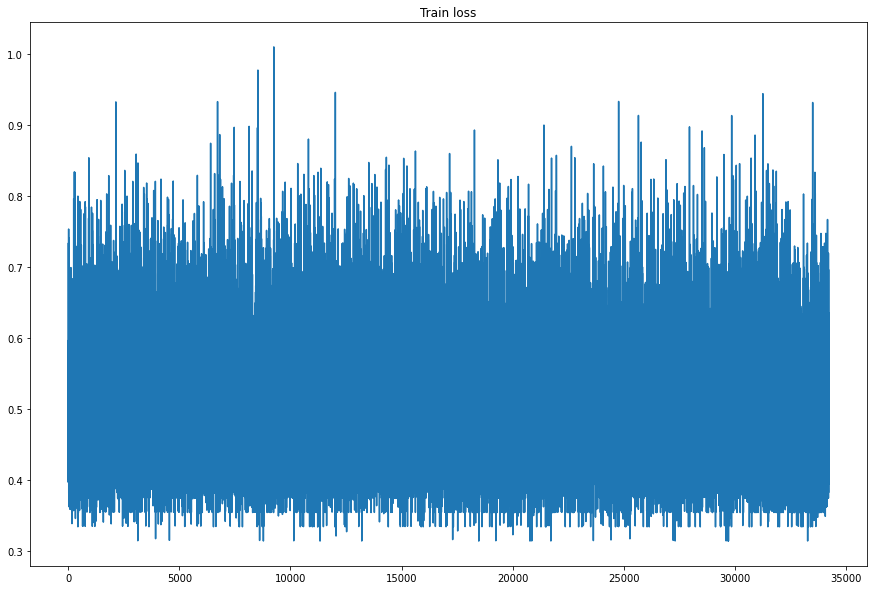

In [53]:
plt.figure(figsize=(15,10))
plt.plot(loss_set)
plt.title('Train loss')
plt.show()

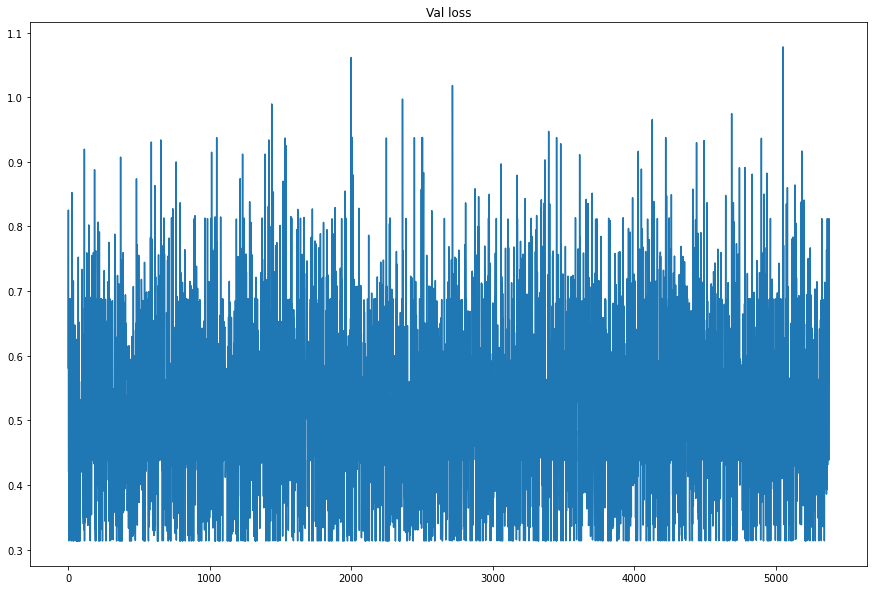

In [54]:
plt.figure(figsize=(15,10))
plt.plot(val_loss_set)
plt.title('Val loss')
plt.show()

In [58]:
np.mean(val_loss_set[:1000])

0.511722881346941

In [59]:
np.mean(val_loss_set[1000:2000])

0.5185339579582214

In [60]:
np.mean(val_loss_set[2000:3000])

0.5091234363913536

In [61]:
np.mean(val_loss_set[3000:4000])

0.517169146925211

In [62]:
np.mean(val_loss_set[4000:5000])

0.5276919349133968